In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy 
from scipy import signal
import cv2 as cv
import time

In [2]:
class life():
    
    def __init__(self, init_state):
        self.state = init_state    # nDimX x nDimY grid of 1s or 0s
        self.nDimX = np.asarray(self.state).shape[1]  # num cols
        self.nDimY = np.asarray(self.state).shape[0]  # num rows  
        self.steady = False                           # we haven't reached steady state yet
        self.convState = np.empty_like(self.state)
    
    
    def convolve(self):
        # create kernel
        kernel = np.ones((3,3))
        
        # convolve with the kernel
        convolution = signal.convolve2d(self.state, kernel, mode='same', boundary='fill')
        convolution = np.asarray(convolution)
        
        assert convolution.shape[0] == self.nDimY, print('actual shape[0]: {}'.format(convolution.shape[0]))
        assert convolution.shape[1] == self.nDimX, print('actual shape[1]: {}'.format(convolution.shape[1]))
        
        self.conv = convolution - self.state
    
    
    def rule1(self):
        # death by underpopulation rule
        # check if a live cell has fewer than two live neighbors
        rule1Update = np.array(self.conv >= 2)
        return rule1Update
    
    
    def rule2(self):
        # death by overpopulation rule
        # check if a live cell has greater than three live neighbors
        rule2Update = np.array(self.conv <= 3)  # False if grid>3
        return rule2Update
    
    
    def rule3(self):
        # life by reproduction rule
        # check if a dead cell has exactly three live neighbors
        rule3Update = np.array(self.conv == 3)
        return rule3Update
        
        
    def checkIfSteady(self, prevState):
        diff = self.state - prevState
        steadyState = False if diff.any()==True else True
        return steadyState
    
    
    def nextGeneration(self):
        # check for no change
        prevState = self.state
        
        # convolve for the current grid state
        self.convolve()
        
        # check all the rules and update the state
        self.state = self.state.astype(bool)*self.rule1()*self.rule2() + self.rule3()   
        self.state = self.state.astype(int)
        
        # update steady state flag
        self.steady = self.checkIfSteady(prevState)
    
    
    def playLife(self, num_iter):
        
        fig, ax = plt.subplots()
        count = 0
        ims = []                                        # list of lists for the state images 
        
        while (count < num_iter) and (self.steady == False):     # self.steady == False:
            self.nextGeneration()
            im = ax.imshow(self.state, animated=True)
            # plt.savefig("plot{}.png".format(count+1)) # Works! But unnecessary here since the movie gets made!  
            if count == 0:
                ax.imshow(self.state)                   # showing the  initial state of the grid first
                plt.savefig("plot0.png")
            count += 1
            ims.append([im])
        
        print('Done iterating through {} generations'.format(count-1))
        
        ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,    # 50
                                repeat_delay=1000)

        ani.save("gameOfLife.mp4")

(25, 25)
Done iterating through 199 generations


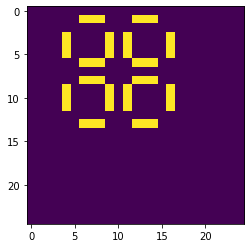

In [3]:

initial_state = np.array([[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0],
                          [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                          [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                          [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
                          [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
                          [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
                          [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                          [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                          [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                          [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                          [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
                          [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
                          [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                          [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
                          [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0],
                          [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                          [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                          [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                          [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],])

print(initial_state.shape)

gol = life(initial_state)

gol.playLife(num_iter=200)    # iterate 100 times or until steady state is reached, whichever comes first!

In [ ]:
# we know where the start is and the finish - they are given to us
# we know the whole maze layout; this is not SLAM
# We know the rules for the automata - game of life
# cells where the maze has walls the value will be -1: telling the current cell it has one less neighbour to consider
# and this neighbour is neither aalive nor dead. It is a wall. And it cannot change state!
